# Mini Programming Assignment: Implement Dynamic Programming

**Name:** Ben Prescott

**Date:** 08/21/2021

**Course:** MSDS432 Summer 2021

#### Executive Summary

**Description:**

For this assignment I chose to leverage the 'Longest Common Subsequence' (LCS) dynamic programming algorithm. The algorithm used in this assignment came from geeksforgeeks.com, keeping the code the same with one exception - returning the entire table as well as the longest sequence. This is used to take the algorithm's output and display it in table format to determine how the algorithm works from a visual perspective. 

**Applications & Approach:**

The LCS algorithm was applied to three different use cases: the supplied 'out of the box' short strings, generated DNA sequences, and created SHA256 hashes of two different phrases. This mimic's some potential use cases with sequencing and pattern detection within bioinformatics, as well as matching subsequences between two different SHA256 hashes tied to security/encryption methods. 

The same root algorithm was used for for the three different tests, using Pandas DataFrames as a method of reviewing the algorithm's output and supporting the explanation of how the algorithm works. The Pandas Styler was also used for the initial test and SHA256 example to highlight the largest values for each column, providing more visual aids to seeing how the algorithm functions. 

**LCS Algorithm Explanation:**

The LCS algorithm starts by taking two input sequences, such as two strings, that may or may not be the same length. The algorithm then determines the length of each of the input strings, which will be used to construct a table (Python list in this case) to store future values. The inputs are treated as the X and Y axis of a table, or rows and columns. For this algorithm the first string (X) will define the rows and the second string input (Y) defines the number of columns. or**

This list/table is then staged with 'None' or empty values with the length of each string plus 1 to create the rows and columns 1 value longer than the length of each string. For example, if my first string is 100 characters long and second string is 200 characters long, the total number of columns in my table will be 101 with 201 rows. This is done to set all values of the entire first row and first column as zeros, which is the next step in the algorithm. Once the first column and row have had their values set to zeros the algorithm then goes into the core method of determing subsequence length.

Starting at the next empty cell in row two column two, the algorithm looks to see if the value of that item in the strings match. If so, it will add 1 to the top left diagonal's value, or (current row position -1) and (current column position -1). This new value is then entered into the cell. 

However, for any cells that do not have matching string values, the algorithm will enter the maximum value of the entry before it. In other words, (current row position -1) **or** (current column position -1), whichever value is larger. This value then becomes the value of the cell without matching row/column string values. 

Take the below example, matching strings 'BENJAMIN' with 'BCDMIOKL'. We've initialized the first row and column with zero padding, now trying to determine if the next string value (row 2, col 2) match each other.

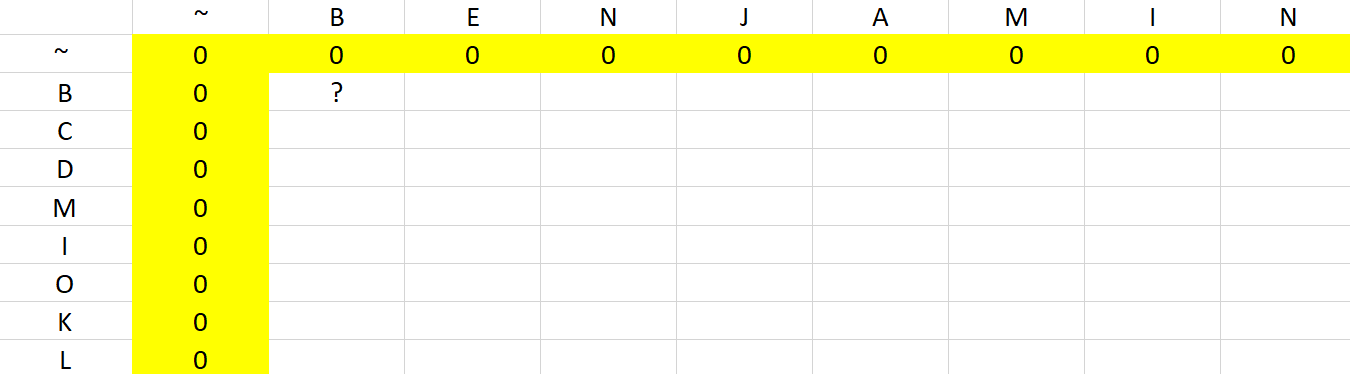

In this case they do, so we'll take the value from the previous column and previous row (which is 0) and add 1 to it, giving us a new value of 1. This value is added in the cell. 

The next column ('E') does not match with the current row ('B'), so the algorithm will look at the value to the left and directly above the current cell. Whatever value is the largest it will place in the current empty cell. In this case the previous entry ('B' and 'B' = 1) is larger than 0, so 1 will be entered. This process continues for every value until the length of both strings has been exhausted, creating a completed table. The largest value in the table, at the intersection of the last row and last column, represents the longest common sequence between the two input strings. 

For the example of 'BENJAMIN' and 'BCDMIOKL', we can see the longest common subsequence is 3, which is 'BMI'. 

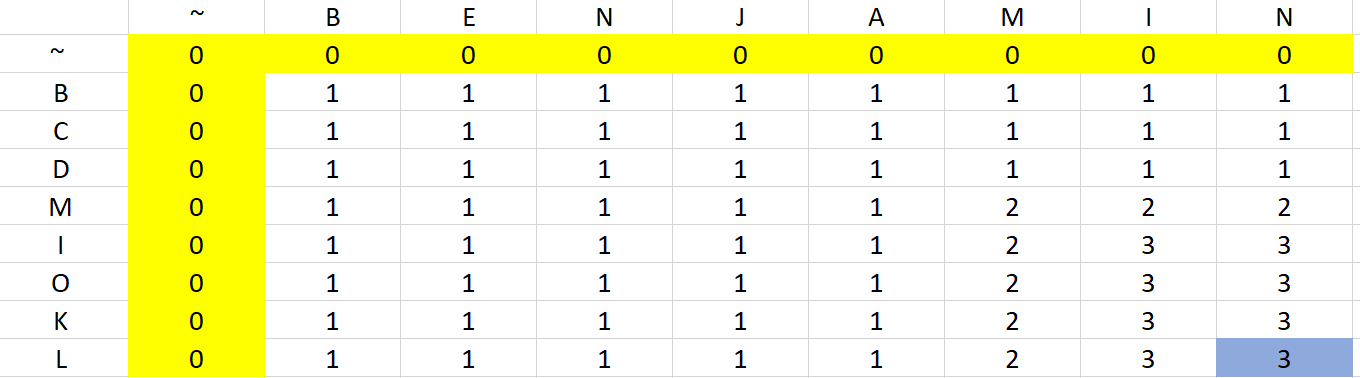

In [1]:
import warnings
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.simplefilter(action='ignore', category=FutureWarning)

## Scenario 1 - Initial Test

In [2]:
# Dynamic Programming implementation of LCS problem
 
def lcs(X , Y):
    # find the length of the strings
    m = len(X)
    n = len(Y)
 
    # declaring the array for storing the dp values
    L = [[None]*(n+1) for i in range(m+1)]
 
    """Following steps build L[m+1][n+1] in bottom up fashion
    Note: L[i][j] contains length of LCS of X[0..i-1]
    and Y[0..j-1]"""
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0 :
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = max(L[i-1][j] , L[i][j-1])
 
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1]
    return L, L[m][n]
#end of function lcs
 
 
# Driver program to test the above function
X = "AGGTAB"
Y = "GXTXAYB"
output, longest = lcs(X,Y)

In [3]:
# Create initial dataframe from output
initialDF = pd.DataFrame(output)

# Make a copy of the dataframe for styling
initialDF2 = initialDF.copy()

# Creating a list from the hashes, adding a zero to the beginning
# This is done for replacing column/row names with each letter, as they are zero padded
l1 = [i for i in Y]
l1.insert(0,0)

l2 = [i for i in X]
l2.insert(0,0)

# Replacing column and index values with the list values
initialDF2.columns = l1
initialDF2.index = l2

# Highlight the maximum value in each row
initialDF = initialDF.style.highlight_max(color = 'blue', axis = 0)

In [4]:
print('The longest common subsequence is:',longest,'\n')
print(display(initialDF2))
print(display(initialDF))

The longest common subsequence is: 4 



,0,G,X,T,X,A,Y,B
0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,1,1,1
G,0,1,1,1,1,1,1,1
G,0,1,1,1,1,1,1,1
T,0,1,1,2,2,2,2,2
A,0,1,1,2,2,3,3,3
B,0,1,1,2,2,3,3,4


None


,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1
2,0,1,1,1,1,1,1,1
3,0,1,1,1,1,1,1,1
4,0,1,1,2,2,2,2,2
5,0,1,1,2,2,3,3,3
6,0,1,1,2,2,3,3,4


None


## Scenario 2 - DNA Sequences

In [15]:
# Randomly generated DNA sequences
randomDNA1 = "aatgataattgccactcaaccccctgatccagctcagctgatttgaacgatagcaccgca\
tgcataacggctattttcaagcatcgagactcattggctggcacggggtctcactacttg\
gggaaatacccaccagtttctctctacggttcaattgtgacggtgccggtacacattgtc\
cggttttacgcagctgtatttccgctaggagtgttagagccactggccagtctatctgga\
ctatgtcaggctaaaccattttggtccaaccagcgagcctatggcctagaattcccataa\
ccttcggaaatctcatcgcccgactcgtttcttaaaacatagttcagttaggctgatccc\
actagtgacctccaaacgtgcgcggtacctcacaagaaatcaaaggcagggtcggaatta\
gatacggatatcgctcgttgccggctcggcgtagggaagcatgtttatggtctacggccg\
cgatggtcgtaagaacagatgtagaaatcttatgactccccccaacacccgctcgaggag\
ggtactccagagctcttagcaatctccgtcattgcgcgcccgttcccggtccccattctg\
gatgcttgacagaggttcacggggctgtggttacactgcgtaactacctgacgataagga\
taaaggaacacggagacagtctggcaccgactctgagctggctctgcccaaatgcacgag\
gcgcatggagagcgcccaatgacccgacactatcctcagttctgaaagttgagtcgtata\
aggcgatactctcttcccacacccgaatataaactggacttcccgatgtagctcggttat\
ctaaaattctgtgtgcatggaccaaggtacgactgcggtatactccgctaaattccacga\
ccactgggaccgcccttaaaagtcttatatttgctactttagcgggaaggtggcctgcat\
cgactggtttcccacagagctcagtgatcgtccgctgcgc\
"

randomDNA2 = "aggcaatgatgtaaaccccgctcgttaggagctggctggtcccatactctcgatctatca\
ggacgatctctcaccagaaagcgaaagcttacagccagttaattgccagctcctgcctcc\
gtcgctaaaacgtcagattttctgtaagccgtaccctgtccactaatgacggatataaaa\
tccggattaatggttaggtacccgttaagggagcgtccgagcgcaggctatttacgtgaa\
tgttccatttaattagtcacatcatgatggattgttatgtgcgcggagatatgaccttac\
ggggaccagactccggtatcgtccgaagtggttcgtatgacatccccatagaacacgtgg\
tgtaaacaactacccgctgagggttcgcccccccgatgtagcaggaggtagccatctaac\
tggtgacatttacttatttgggtccatgtgtccgtcgttagctgctctacctagactatg\
agagagcgagtgagagattcagtatgatctatgggcgaaacctaacctttccaaactact\
ttactgatctgattacatattggagaacattagtcaaaattcataatcggcgagatacct\
ttacagagtcgaacgacacggtcccgcgaccaagttatggaaatcgtataccatcatcta\
aagttgcttccagacttgtaccggacgaccgtgtcagccactgatcagactacacatctg\
tagcagcgagtaacattcctaacctacggagataatcaggtgcacctagatgccgtctga\
ccttgtctccaactagttgccaggcttgtttccaactaggatattcgcacgaaaagttcg\
acaacgcatccatactctgcggtgctgggaccgtacatatcatcttcctggttagctgac\
aagacggagccttgagagttcaaaatgacgagatcgcatcgcctccagttgtcaacgggg\
ccgaattgtagtgacgaactatgaatagtcagcactaaaa\
"

In [16]:
# Using the LCS algorithm to determine the output and longest subsequence
output, longest = lcs(randomDNA1,randomDNA2)

In [17]:
# Create initial dataframe from output
dnaDF = pd.DataFrame(output)

# Creating a list from the hashes, adding a zero to the beginning
# This is done for replacing column/row names with each letter, as they are zero padded
l1 = [i for i in randomDNA1]
l1.insert(0,0)

l2 = [i for i in randomDNA2]
l2.insert(0,0)

# Replacing column and index values with the list values
dnaDF.columns = l1
dnaDF.index = l2

# Due to the size of the dataframe I chose to reset the pandas display limitations
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [18]:
print('The longest common subsequence is:',longest,'\n')
print(display(dnaDF))

The longest common subsequence is: 644 



,0,a,a,t,g,a,t,a,a,t,...,t,c,c,g,c,t,g,c,g,c
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
g,0,1,1,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
g,0,1,1,1,1,2,2,3,3,3,...,3,3,3,3,3,3,3,3,3,3
c,0,1,2,2,2,2,2,3,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t,0,1,2,3,4,5,6,7,8,9,...,641,642,643,643,643,644,644,644,644,644
a,0,1,2,3,4,5,6,7,8,9,...,641,642,643,643,643,644,644,644,644,644
a,0,1,2,3,4,5,6,7,8,9,...,641,642,643,643,644,644,644,644,644,644
a,0,1,2,3,4,5,6,7,8,9,...,641,642,643,643,644,644,644,644,644,644


None


## Scenario 3 - SHA256 Hash Check

In [19]:
# Hash of 'this is the original file'
original = '21565F189A350ADA138BD4C20BED6B72953899AA5007E232AAD0606F36E0DC07'

# Hash of 'this is the downloaded file'
downloadedfile = '67D93D4DA558C4304464CDCC22556450257DEEA8332C1F4DD7B3BB0F11A5566D'

In [20]:
output, longest = lcs(original,downloadedfile)

In [21]:
# Create initial dataframe from output
shaDF1 = pd.DataFrame(output)

# Make a copy of the dataframe for styling
shaDF2 = shaDF1.copy()
# Highlight the maximum value in each row
shaDF1 = shaDF1.style.highlight_max(color = 'blue', axis = 0)

# Creating a list from the hashes, adding a zero to the beginning
# This is done for replacing column/row names with each letter, as they are zero padded
l1 = [i for i in downloadedfile]
l1.insert(0,0)

l2 = [i for i in original]
l2.insert(0,0)

# Replacing column and index values with the list values
shaDF2.columns = l1
shaDF2.index = l2

# Setting display to not limit what it seen
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [22]:
print('The longest common subsequence is:',longest,'\n')
print(display(shaDF2))

The longest common subsequence is: 22 



,0,6,7,D,9,3,D,4,D,A,5,5,8,C,4,3,0,4,4,6,4,C,D,C,C,2,2,5,5,6,4,5,0,2,5,7,D,E,E,A,8,3,3,2,C,1,F,4,D,D,7,B,3,B,B,0,F,1,1,A,5,5,6,6,D
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3
6,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4
5,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
F,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6
8,0,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6
9,0,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6


None


In [23]:
print(display(shaDF1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3
4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4
5,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
7,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6
8,0,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6
9,0,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6


None
